# Introduction

## Goal
Reading text list from stored file in 1st lecture

Figuring out most popular lecture by lecture title frequency

Figuring out most popular lecture by Bag Of Words

Figuring out most popular lecture by Bag of Wirds with TF-IDF

Figuring out most popular lecture by Clustering with KMeans

Figuring out most popular lecture by Clustering with MiniBatchKMeans

# Reading text list from stored file in 1st lecture

In [2]:
import pandas as pd
import numpy as np
import re # Regular expression
import matplotlib.pyplot as plt # Data visualization

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
plt.rc('font', family="AppleGothic")
plt.rc('axes', unicode_minus=False)

In [4]:
df = pd.read_csv('temp/inflearn-event.csv')
df.shape

(2448, 1)

In [5]:
df.head()

,text
0,2020년 목표: 프알못에서 프로젝트 마스터 되기 \n관심 있는 강의 : 스프링 ...
1,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
2,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
3,2020년 목표 : 리액트 공부하기
4,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급


In [6]:
df.tail()

,text
2443,"작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 김영한님의 JPA 강의를 또 스..."
2444,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...
2445,"에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다..."
2446,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...
2447,인프런 0호 팀원이에요!\n그동안 서비스 개발 때문에 js 를 많이 했었는데 앞으론...


# Preprocessing

In [7]:
# Remote duplication
# Lecture say that this duplication comes from network connection but I don't understand
df = df.drop_duplicates(['text'], keep='last')
df.shape

(2410, 1)

In [8]:
df['origin_text'] = df['text']

In [9]:
df.head()

,text,origin_text
0,2020년 목표: 프알못에서 프로젝트 마스터 되기 \n관심 있는 강의 : 스프링 ...,2020년 목표: 프알못에서 프로젝트 마스터 되기 \n관심 있는 강의 : 스프링 ...
1,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
2,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는...","2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
4,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
5,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!


In [10]:
df["text"] = df["text"].str.lower()

In [11]:
# English word to Korean word
# There might be better replace code such as using array...
df["text"] = df["text"].str.replace(
    "python", "파이썬").str.replace(
    "pandas", "판다스").str.replace(
    "javascript", "자바스크립트").str.replace(
    "java", "자바").str.replace(
    "react", "리액트")

In [12]:
df.head()

,text,origin_text
0,2020년 목표: 프알못에서 프로젝트 마스터 되기 \n관심 있는 강의 : 스프링 ...,2020년 목표: 프알못에서 프로젝트 마스터 되기 \n관심 있는 강의 : 스프링 ...
1,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
2,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
4,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
5,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!


In [13]:
# New column "course"
# Event text are supposed to have interesting course after word "관심강의" 
df["course"] = df["text"].apply(lambda x: x.split("관심강의")[-1])
df["course"] = df["course"].apply(lambda x: x.split("관심 강의")[-1])
df["course"] = df["course"].apply(lambda x: x.split("관심 있는 강의")[-1])
df["course"] = df["course"].apply(lambda x: x.split("관심있는 강의")[-1])
df["course"] = df["course"].apply(lambda x: x.split("관심 강좌")[-1])
df["course"] = df["course"].str.replace(":", "")
df["course"].head()

0                              스프링 , 리액트
1                              스프링 웹 mvc
2                                따배씨 c++
4    40대 프로그래밍 시작!  우리를 위한 프로그래밍  파이썬 중급
5         2020년 목표  돌머리 비전공자가 멋진 전공자 되기!
Name: course, dtype: object

In [14]:
df[["text", "course"]].tail()

,text,course
2443,"작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 김영한님의 jpa 강의를 또 스...",스프링 데이터 jpa
2444,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...,스프링 부트 개념과 활용
2445,"에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다...",에펙 초보자도 만들 수 있는 유튜브 인트로 에프터이펙트 강좌
2446,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...,파이썬 입문 및 웹 크롤링을 활용한 다양한 자동화 어플리케이션 제작하기
2447,인프런 0호 팀원이에요!\n그동안 서비스 개발 때문에 js 를 많이 했었는데 앞으론...,남박사의 파이썬 활용


# Figuring out most popular lecture by lecture title frequency

In [15]:
# In this approach, lecture titles are given by manualy
search_keyword = ['머신러닝', '딥러닝', '파이썬', '판다스', '공공데이터',
                  'django', '크롤링', '시각화', '데이터분석', 
                  '웹개발', '엑셀', 'c', '자바', '자바스크립트', 
                  'node', 'vue', '리액트']

# Each lecture has new column of boolean type
for keyword in search_keyword:
    df[keyword] = df["course"].str.contains(keyword)

In [16]:
df.head()

,text,origin_text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트
0,2020년 목표: 프알못에서 프로젝트 마스터 되기 \n관심 있는 강의 : 스프링 ...,2020년 목표: 프알못에서 프로젝트 마스터 되기 \n관심 있는 강의 : 스프링 ...,"스프링 , 리액트",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,스프링 웹 mvc,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는...",따배씨 c++,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 돌머리 비전공자가 멋진 전공자 되기!,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
# New dataframe having given keyword in "text" column
# contains returns boolean => only column having true are returned
df_python = df[df["text"].str.contains("파이썬|공공데이터|판다스")].copy()
df_python.shape

(430, 20)

In [18]:
# True is 1, False is 0. Thus sum means number of True
df[search_keyword].sum().sort_values(ascending=False)

c         409
파이썬       404
자바        336
자바스크립트    140
리액트       137
머신러닝      132
vue       130
node      117
크롤링        56
딥러닝        52
django     31
시각화        30
웹개발        27
데이터분석      23
엑셀         18
공공데이터      12
판다스         6
dtype: int64

In [19]:
text = df.loc[(df["공공데이터"] == True), "text"]
for t in text:
    print("-"*20)
    print(t)

--------------------
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
파이썬의 고수가 되고싶어요
--------------------
자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 파이썬이 궁금합니다.
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
올해 안에 원하는 공부 다 끝내보려고요. 내년이면 수능이라..

#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
it개발자입니다. 개발을 오래 안하고 관리만 했더니 다시 개발이 너무 하고싶습니다. 올해는 인프런을 통해서 개발쪽 스킬셋을 업그레이드 하고 싶습니다!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
파이썬 데이터분석 마스터
#관심강의:공공데이터로 파이썬 데이터 분석 시작하기
--------------------
올해 졸업하는 컴퓨터공학과 학생입니다!
백엔드 혹은 데이터 엔지니어 쪽으로 취업하고 싶습니다!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
텍스트 마이닝만 수강한 뒤 현재 맡은 마케팅 업무 능률이 엄청나게 올라가는 것을 확인했으며 승진과 고가에 엄청나게 득을 보았습니다 감사합니다! 앞으로도 인프런 애용하겠습니다.
추가적으로 해 박조은 강사님의 [공공데이터로 파이썬 데이터 분석 시작하기] 강의를 듣고 상권분석과 공공데이터 활용 역량을 올릴 예정입니다. 화이팅!!!
#관심강의 : 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
데이터분석 2년차가 되는데 작년에 파이썬 강의를 담아놓고 그대로 1년간 방치... 올해는 꼭 완강하고 실습해서 개발자에게 의존하지 않고 혼자 크롤링&분석 해내고 싶어요! 
#관심강의: 공공데이터로 파이썬 데이터분석 시작하기, database 1&2 - mysql
------

In [20]:
df.loc[df["판다스"] == True, "text"]

542     2020년에는 데이터분석 관련한 실력을 쌓고싶습니다!\n#관심강의 : 파이썬, 판다...
691     취미로 안드로이드 개발하는 사람입니다. 자바로 작성하다 보니, kotlin이 안드로...
758          판다스 라입러리에 관심이 많아서 배워보려 합니다 #관심강의 : 박조은 - 판다스
1237      2020년!! 올 해는 빅데이터 분석 전문가 되기!!\n#관심강의 : 파이썬, 판다스
2154    2020년 목표  파이썬 을  활용해  데이터 분석 작업을 진행하고 싶습니다.  관...
2364    저는 백세시대에 조금 더 오랫동안 it일을 하기위해서 it전략기획에서 데이터분석가로...
Name: text, dtype: object

# Figuring out most popular lecture by Bag Of Words

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
vectorizer = CountVectorizer(analyzer='word',
                            tokenizer=None,
                            preprocessor=None,
                            stop_words=None,
                            min_df=2,
                            ngram_range=(3,6),
                            max_features=2000
                            )
vectorizer

CountVectorizer(max_features=2000, min_df=2, ngram_range=(3, 6))

In [23]:
feature_vector = vectorizer.fit_transform(df['course'])
feature_vector.shape

(2410, 2000)

In [24]:
# ngram_range is from 3 to 6, Thus each vocabulary consist of 3 to 6 words 
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

2000


['12개 만들면서 배우는',
 '12개 만들면서 배우는 ios',
 '12개 만들면서 배우는 ios 아이폰',
 '12개 만들면서 배우는 ios 아이폰 개발',
 '12개를 만들며 배우는',
 '12개를 만들며 배우는 swift4',
 '12개를 만들며 배우는 swift4 ios11',
 '12개를 만들며 배우는 swift4 ios11 아이폰',
 '2018 do it',
 '2018 do it 안드로이드']

In [31]:
pd.DataFrame(feature_vector[0:10].toarray(), columns=vocab )
# This dataframe is very very sparse

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Make sparse data to another form using sum 
dist = np.sum(feature_vector, axis=0)
df_freq = pd.DataFrame(dist, columns=vocab)
df_freq

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍
0,2,2,2,2,2,2,2,2,2,2,...,16,13,13,12,2,8,8,2,2,2


In [33]:
# T means Transpose
df_freq.T.sort_values(by=0, ascending=False).head(100)

,0
홍정모의 따라하며 배우는,100
스프링 데이터 jpa,60
nodebird sns 만들기,59
리액트로 nodebird sns,49
파이썬 머신러닝 완벽,49
...,...
리액트 초심자를 위한,20
초심자를 위한 리액트 핵심,20
위한 리액트 핵심 강좌,20
리액트 초심자를 위한 리액트,20


# Figuring out most popular lecture by Bag Of Word with TF-IDF
While Bag Of Word is just frequency,
TF-IDF is almost same but uses frequency and weighted value

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(smooth_idf=False)

In [35]:
%%time 
feature_tfidf = transformer.fit_transform(feature_vector)
feature_tfidf.shape

CPU times: user 3.47 ms, sys: 1.78 ms, total: 5.25 ms
Wall time: 3.74 ms


(2410, 2000)

In [36]:
feature_tfidf

<2410x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 11535 stored elements in Compressed Sparse Row format>

In [37]:
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(), columns=vocab)
tfidf_freq.head()

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_tfidf = pd.DataFrame(tfidf_freq.sum())
df_tfidf_top = df_tfidf.sort_values(by=0, ascending=False)
df_tfidf_top.head(20)

,0
홍정모의 따라하며 배우는,66.601091
스프링 데이터 jpa,35.495553
nodebird sns 만들기,27.514340
파이썬 머신러닝 완벽,25.246931
머신러닝 완벽 가이드,24.999206
리액트로 nodebird sns,24.968312
리액트로 nodebird sns 만들기,24.968312
파이썬 머신러닝 완벽 가이드,24.349055
프로그래밍과 자바스크립트 es6,19.214161
함수형 프로그래밍과 자바스크립트 es6,18.297855


# Figuring out most popular lecture by Clustering with KMeans

In [43]:
from sklearn.cluster import KMeans
from tqdm import trange
inertia = []

start = 10
end = 50

# Test to proper cluster number
for i in trange(start, end):
    cls = KMeans(n_clusters=i, random_state=42) # random_state is fixed intentionally to compare to MiniBatch case
    cls.fit(feature_vector)
    inertia.append(cls.inertia_)

100%|██████████| 40/40 [00:14<00:00,  2.68it/s]


Text(0.5, 1.0, 'KMeans cluster number')

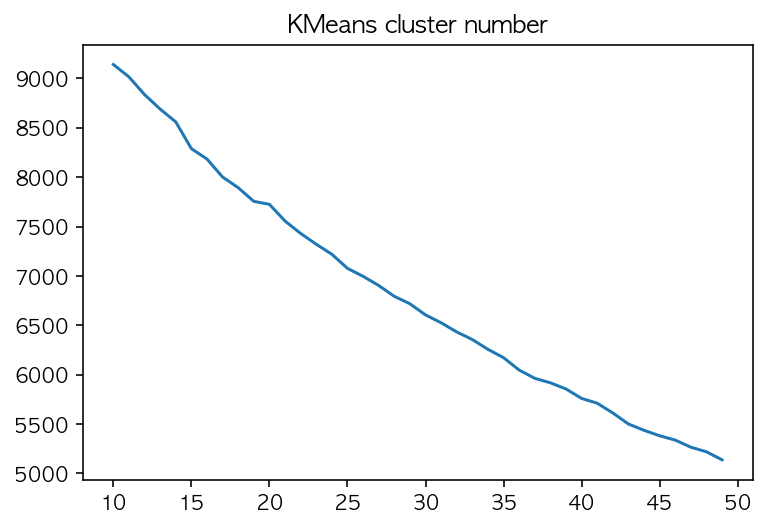

In [45]:
plt.plot(range(start, end), inertia)
plt.title("KMeans cluster number")

In [47]:
# Graph by plt shows the more cluster, the better cohesion
n_clusters = 30  # But letcure used 30 as number of cluster, I don't know the reason.
cls = KMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_vector)
predict = cls.predict(feature_vector)
df["cluster"] = predict

In [50]:
df["cluster"].value_counts().head(10)

1     1912
17      47
9       44
19      37
6       33
29      30
3       30
0       30
21      28
4       25
Name: cluster, dtype: int64

In [57]:
df.loc[df["cluster"] == 17, ["course"]]

,course
90,파이썬 머신러닝 완벽 가이드 등
168,파이썬 머신러닝 완벽 가이드
179,파이썬 머신러닝 완벽 가이드
354,파이썬 머신러닝 완벽 가이드
592,파이썬 머신러닝 완벽 가이드
727,파이썬 머신러닝 완벽 가이드 - 권철민
738,파이썬 머신러닝 완벽 가이드
741,파이썬 머신러닝 완벽 가이드
774,파이썬 머신러닝 완벽 가이드
782,파이썬 머신러닝 완벽 가이드


# Figuring out most popular lecture by Clustering with MiniBatchKMeans

In [58]:
from sklearn.cluster import MiniBatchKMeans
b_inertia = []

for i in trange(start, end):
    cls = MiniBatchKMeans(n_clusters=i, random_state=42)
    cls.fit(feature_vector)
    b_inertia.append(cls.inertia_)

100%|██████████| 40/40 [00:03<00:00, 12.95it/s]


Text(0.5, 1.0, 'MiniBatchKMenas cluster nuber')

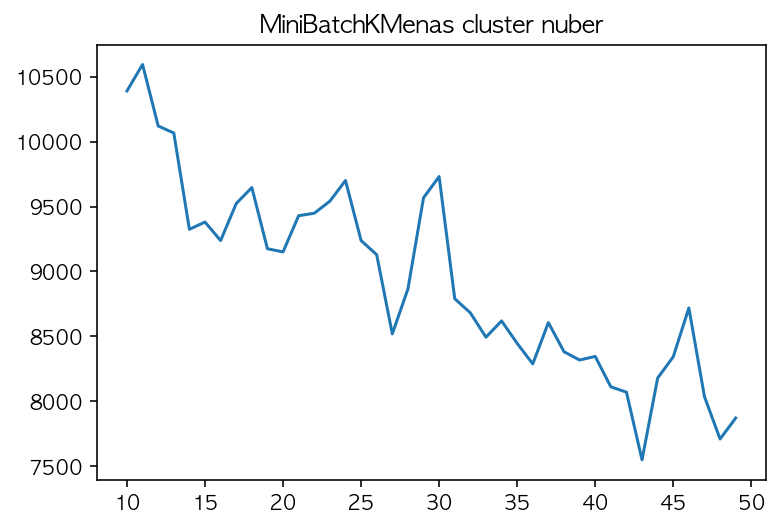

In [59]:
plt.plot(range(start, end), b_inertia)
plt.title("MiniBatchKMenas cluster nuber")

In [60]:
cls = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_vector)
predict = cls.predict(feature_vector)
df["bclusters"] = predict

In [61]:
df["bclusters"].value_counts().head(10)

10    1423
1      583
15      87
5       48
3       37
7       35
8       30
14      30
24      23
2       20
Name: bclusters, dtype: int64

In [64]:
df.loc[df["bclusters"] == 5, ["bclusters", "cluster", "course"]]

,bclusters,cluster,course
34,5,8,첫번째로는 vue.js 공부하고자 합니다.\nvue.js 시작하기 - age of ...
173,5,1,vue.js 완벽 가이드
222,5,19,자바스크립트를 마스터하고 싶어요~\n#함수형 프로그래밍과 자바스크립트 es6+
302,5,19,함수형 프로그래밍과 자바스크립트 es6+
311,5,19,함수형 프로그래밍과 자바스크립트 es6+
323,5,19,함수형 프로그래밍과 자바스크립트 es6+
341,5,19,함수형 프로그래밍과 자바스크립트 es6+
373,5,1,경자년에는 front하나 후딱 마스터해서 프로젝트 데모나 업무등 다방면에서 편하게 ...
442,5,19,"자바스크립트 중고급 자바스크립트의 근본 핵심 이해, 함수형 프로그래밍과 자바스크..."
489,5,8,vue.js 시작하기 - age of vue.js /\nvue.js 중급 강좌 ...


# Visualization

In [65]:
from wordcloud import WordCloud

In [66]:
stopwords = ["관심 강의", "관심강의", "관심", "강의", "강좌", "강의를",
              "올해", "올해는", "열심히", "공부를", "합니다", "하고", "싶어요", 
              "있는", "있습니다", "싶습니다", "2020년"]

In [76]:
def displayWordCloud(data = None, backgroundcolor = 'white', width=1280, height=768):
        wordcloud = WordCloud(
            font_path = '/Library/Fonts/Arial Unicode.ttf',
            stopwords = stopwords,
            background_color = backgroundcolor,
            width = width,
            height = height).generate(data)
        plt.figure(figsize = (15, 10))
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.show()

In [72]:
course_text = " ".join(df["course"])

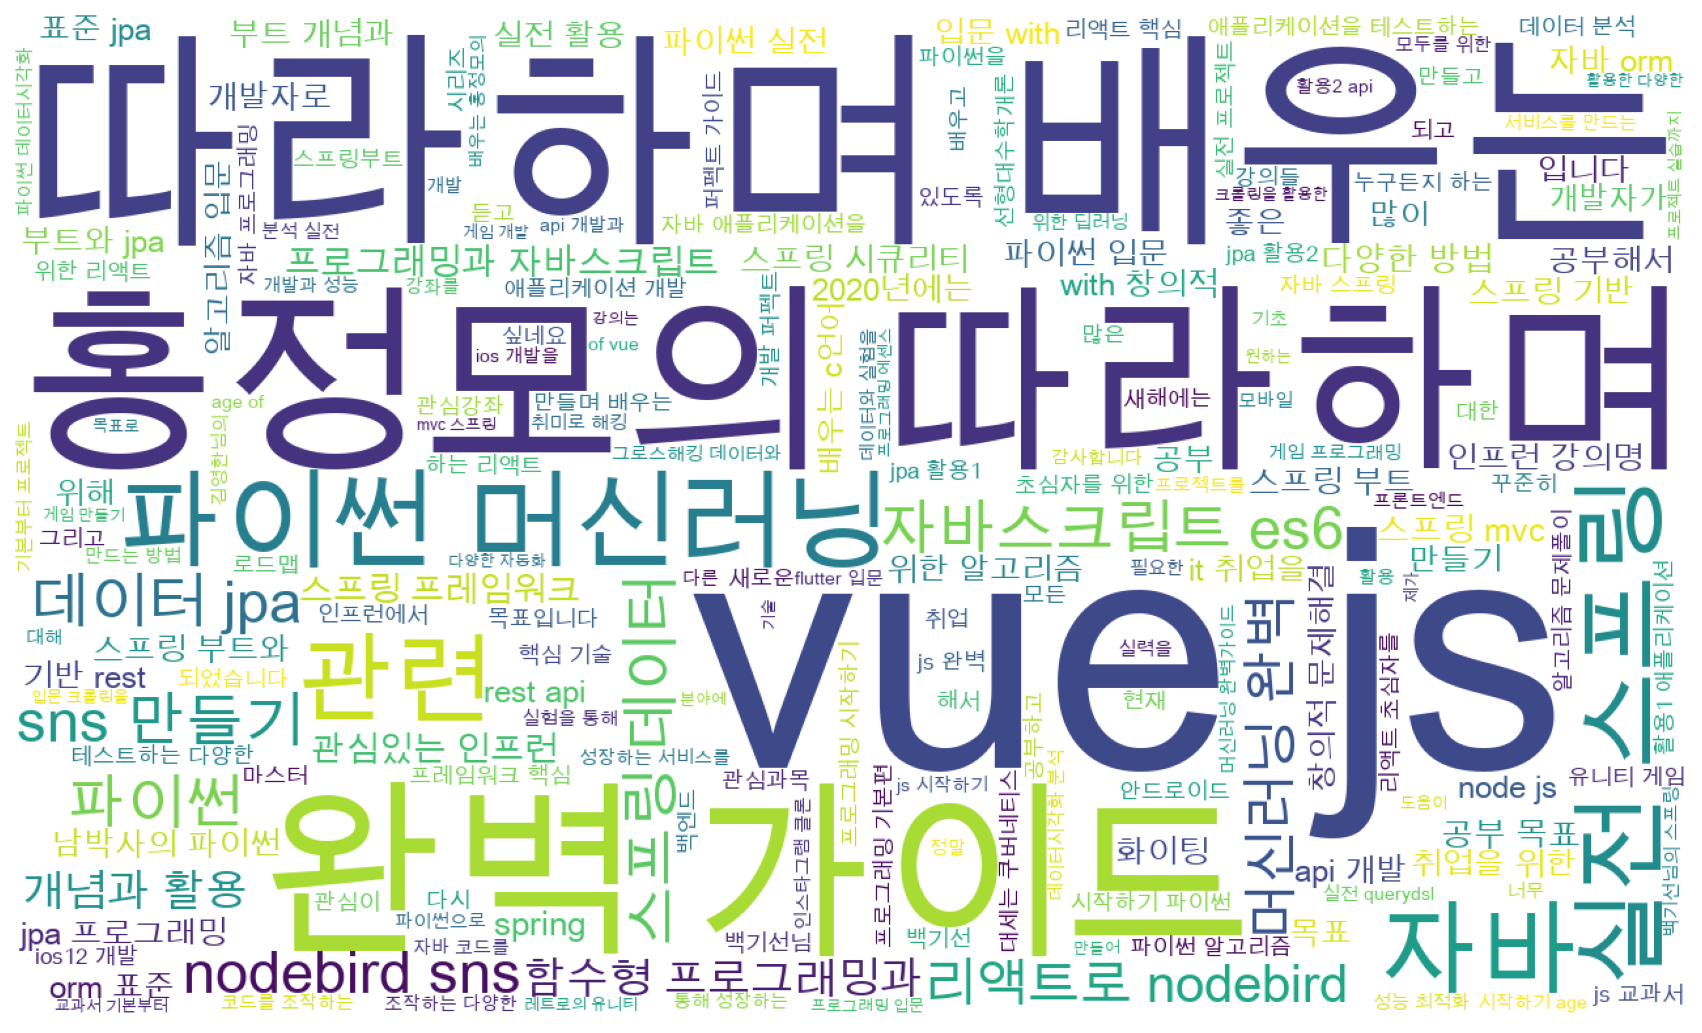

In [77]:
displayWordCloud(course_text)